## Resumen da Datos mediante tablas Pivot

Las tablas pivot nos ayuda a agrupar valores relacionados con otros valores de interes

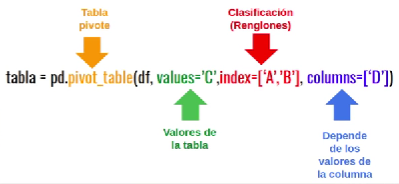

In [2]:
# librerias
import pandas as pd

In [3]:
# Datos de las app provenientes de Google
df1 = pd.read_csv('./data/go.csv')
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# listar encabezados de las columnas
list(df1)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [5]:
# Cantidad de valores unicos en una Columna
len(df1.App.unique())

9660

### Agrupar valores mediante la funcion pivot_table

In [6]:
pivot = pd.pivot_table(df1, # dataframe
                       index=['Content Rating', 'Category'], # agrupar valores por 
                       values=['Rating'], # valores
                       columns=['Type'], # columna de interes
                       aggfunc='count') # funcion de agregacion para aplicar sobre los valores

pivot

Rating      
Type                               Free  Paid
Content Rating  Category                     
Adults only 18+ COMICS              2.0   NaN
                SPORTS              1.0   NaN
Everyone        COMICS             25.0   NaN
                SPORTS            253.0  22.0
                ART_AND_DESIGN     55.0   3.0
...                                 ...   ...
Teen            TRAVEL_AND_LOCAL    5.0   NaN
                VIDEO_PLAYERS      24.0   NaN
                WEATHER             2.0   NaN
Unrated         FAMILY              0.0   NaN
                TOOLS               1.0   NaN

[118 rows x 2 columns]

### Convertir valores nulos en ceros

In [7]:

pivot.fillna('0', inplace=True)

In [8]:
pivot

Rating      
Type                               Free  Paid
Content Rating  Category                     
Adults only 18+ COMICS              2.0     0
                SPORTS              1.0     0
Everyone        COMICS             25.0     0
                SPORTS            253.0  22.0
                ART_AND_DESIGN     55.0   3.0
...                                 ...   ...
Teen            TRAVEL_AND_LOCAL    5.0     0
                VIDEO_PLAYERS      24.0     0
                WEATHER             2.0     0
Unrated         FAMILY              0.0     0
                TOOLS               1.0     0

[118 rows x 2 columns]

### Exportar tabla a Excel

In [9]:
writer = pd.ExcelWriter('./data/pivot_go.xlsx')  # creamos un objeto de tipo excel 
pivot.to_excel(writer, 'GoogleApp')  # convertimos el objeto en un archivo excel

writer.save()

### Otras Tablas Pivot

In [14]:
# agrupar los datos de la version de android segun el tamaño de la app
pivot2  = pd.pivot_table(df1, # dataframe
                       index=['Type'], # agrupar valores por 
                       values=['Size'], # valores
                       columns=['Android Ver'], # columna de interes
                       aggfunc='count') # funcion de agregacion para aplicar sobre los valores

pivot2

Size                                                \
Android Ver 1.0 and up 1.5 and up 1.6 and up 2.0 and up 2.0.1 and up   
Type                                                                   
Free               2.0       14.0       77.0       26.0          2.0   
Paid               NaN        6.0       39.0        6.0          5.0   

                                                                       ...  \
Android Ver 2.1 and up 2.2 - 7.1.1 2.2 and up 2.3 and up 2.3.3 and up  ...   
Type                                                                   ...   
Free             107.0         1.0      195.0      580.0        251.0  ...   
Paid              27.0         NaN       49.0       72.0         30.0  ...   

                                                                    \
Android Ver 5.0 - 7.1.1 5.0 - 8.0 5.0 and up 5.1 and up 6.0 and up   
Type                                                                 
Free                1.0       2.0      569.0       21.0       55.0   
Paid                NaN       NaN       32.0        3.0        5.0   

                                                                             
Android Ver 7.0 - 7.1.1 7.0 and up 7.1 and up 8.0 and up Varies with device  
Type                                                                         
Free                1.0       29.0        3.0        5.0             1295.0  
Paid                NaN       13.0        NaN        1.0               66.0  

[2 rows x 33 columns]

In [18]:
# cantidad de apps tanto gratis como pagas segun el genero
pivot3 = pd.pivot_table(df1, # dataframe
                       index=['Genres'], # agrupar valores por 
                       values=['Price'], # valores
                       columns=['Type'],
                       aggfunc='count')

pivot3

Price             
Type                                      0   Free  Paid
Genres                                                  
Action                                  NaN  341.0  24.0
Action;Action & Adventure               NaN   14.0   3.0
Adventure                               NaN   63.0  12.0
Adventure;Action & Adventure            NaN   11.0   2.0
Adventure;Brain Games                   NaN    NaN   1.0
...                                     ...    ...   ...
Video Players & Editors                 NaN  169.0   4.0
Video Players & Editors;Creativity      NaN    2.0   NaN
Video Players & Editors;Music & Video   NaN    3.0   NaN
Weather                                 NaN   74.0   8.0
Word                                    NaN   29.0   NaN

[120 rows x 3 columns]

In [23]:
pivot4 = pd.pivot_table(df1, # dataframe
                       index=['Genres'], # agrupar valores por 
                       values=['Type'], # valores
                       columns=['Reviews'],
                       aggfunc='count')

pivot4

Type                               \
Reviews                                  0    1   10  100 1000417 10006   
Genres                                                                    
Action                                 2.0  1.0  NaN  NaN     2.0   NaN   
Action;Action & Adventure              NaN  NaN  NaN  NaN     NaN   NaN   
Adventure                              1.0  NaN  NaN  1.0     NaN   NaN   
Adventure;Action & Adventure           NaN  NaN  NaN  NaN     NaN   NaN   
Adventure;Brain Games                  NaN  NaN  NaN  NaN     NaN   NaN   
...                                    ...  ...  ...  ...     ...   ...   
Video Players & Editors                4.0  2.0  NaN  NaN     NaN   NaN   
Video Players & Editors;Creativity     NaN  NaN  NaN  NaN     NaN   NaN   
Video Players & Editors;Music & Video  NaN  NaN  NaN  NaN     NaN   NaN   
Weather                                3.0  NaN  NaN  NaN     NaN   NaN   
Word                                   NaN  NaN  1.0  NaN     NaN   NaN   

                                                                 ...       \
Reviews                               100082 100130 100179 1002  ... 9951   
Genres                                                           ...        
Action                                   NaN    NaN    NaN  NaN  ...  NaN   
Action;Action & Adventure                NaN    NaN    NaN  NaN  ...  NaN   
Adventure                                NaN    NaN    NaN  NaN  ...  NaN   
Adventure;Action & Adventure             NaN    NaN    NaN  NaN  ...  NaN   
Adventure;Brain Games                    NaN    NaN    NaN  NaN  ...  NaN   
...                                      ...    ...    ...  ...  ...  ...   
Video Players & Editors                  NaN    NaN    NaN  NaN  ...  NaN   
Video Players & Editors;Creativity       NaN    NaN    NaN  NaN  ...  NaN   
Video Players & Editors;Music & Video    NaN    NaN    NaN  NaN  ...  NaN   
Weather                                  NaN    NaN    NaN  NaN  ...  NaN   
Word                                     NaN    NaN    NaN  NaN  ...  NaN   

                                                                             \
Reviews                               9952 99559 996 9966 997 9971 9975 999   
Genres                                                                        
Action                                 NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
Action;Action & Adventure              NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
Adventure                              NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
Adventure;Action & Adventure           NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
Adventure;Brain Games                  NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
...                                    ...   ...  ..  ...  ..  ...  ...  ..   
Video Players & Editors                NaN   NaN NaN  1.0 NaN  NaN  NaN NaN   
Video Players & Editors;Creativity     NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
Video Players & Editors;Music & Video  NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
Weather                                NaN   NaN NaN  NaN NaN  NaN  NaN NaN   
Word                                   NaN   NaN NaN  NaN NaN  NaN  NaN NaN   

                                            
Reviews                               9992  
Genres                                      
Action                                 NaN  
Action;Action & Adventure              NaN  
Adventure                              NaN  
Adventure;Action & Adventure           NaN  
Adventure;Brain Games                  NaN  
...                                    ...  
Video Players & Editors                NaN  
Video Players & Editors;Creativity     NaN  
Video Players & Editors;Music & Video  NaN  
Weather                                NaN  
Word                                   NaN  

[120 rows x 6002 columns]